### Import Packages

In [1]:
import pickle
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

2024-07-24 13:43:26.541901: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load Pickle Files

In [2]:
def load_pickle(path):
    
    with open(path, 'rb') as handle:
        return pickle.load(handle)

### Select and Flatten Features

In [3]:
def select_feats(x, feat_list):

    x_feats = []
    processed = 0
    
    for image in x:

        print(f'Images processed: {processed} / {len(x)}')

        image_feats = []

        for feat in feat_list:

            image_feats.extend(image[feat].flatten())

        x_feats.append(image_feats)
        processed += 1

    return np.array(x_feats)

### Split Train into Train and Validation

In [4]:
def split_data(x, y, ratio):
    np.random.seed(123)
    shuffled_list = np.arange(0, len(x))
    np.random.shuffle(shuffled_list)

    idx = int(len(shuffled_list) * ratio)
    
    x_train = x[shuffled_list[:idx],:]
    y_train = y[shuffled_list[:idx]]
    x_validation = x[shuffled_list[idx:],:]
    y_validation = y[shuffled_list[idx:]]

    return x_train, x_validation, y_train, y_validation

In [5]:
data_path = './test_train_data/dataset_2'

# Load data from pickle files
x_train = load_pickle(os.path.join(data_path, 'x_train.pickle'))
y_train = np.array(load_pickle(os.path.join(data_path, 'y_train.pickle')))

x_test = load_pickle(os.path.join(data_path, 'x_test.pickle'))
y_test = np.array(load_pickle(os.path.join(data_path, 'y_test.pickle')))

In [5]:
# Select features
feats = ['image']

x_train_select = select_feats(x_train, feats)
x_test_select = select_feats(x_test, feats)

Images processed: 0 / 989
Images processed: 1 / 989
Images processed: 2 / 989
Images processed: 3 / 989
Images processed: 4 / 989
Images processed: 5 / 989
Images processed: 6 / 989
Images processed: 7 / 989
Images processed: 8 / 989
Images processed: 9 / 989
Images processed: 10 / 989
Images processed: 11 / 989
Images processed: 12 / 989
Images processed: 13 / 989
Images processed: 14 / 989
Images processed: 15 / 989
Images processed: 16 / 989
Images processed: 17 / 989
Images processed: 18 / 989
Images processed: 19 / 989
Images processed: 20 / 989
Images processed: 21 / 989
Images processed: 22 / 989
Images processed: 23 / 989
Images processed: 24 / 989
Images processed: 25 / 989
Images processed: 26 / 989
Images processed: 27 / 989
Images processed: 28 / 989
Images processed: 29 / 989
Images processed: 30 / 989
Images processed: 31 / 989
Images processed: 32 / 989
Images processed: 33 / 989
Images processed: 34 / 989
Images processed: 35 / 989
Images processed: 36 / 989
Images proc

### CNN

In [9]:
labels = {'Hairline Fracture':0, 'Fracture Dislocation':1, 'Pathological fracture':2, 'Greenstick fracture':3, 
          'Spiral Fracture':4, 'Impacted fracture':5, 'Comminuted fracture':6, 'Longitudinal fracture':7, 
          'Oblique fracture':8, 'Avulsion fracture':9}

x = []
for image in x_train:
    x.append(image['image'])

X_train = np.array(x)

X_train, X_validation, Y_train, Y_validation = split_data(X_train, y_train, 0.9)

Y_train = np.array([labels[y] for y in Y_train])
Y_validation = np.array([labels[y] for y in Y_validation])

X_train = X_train / 255.0
X_validation = X_validation / 255.0

x = []
for image in x_test:
    x.append(image['image'])

X_test = np.array(x)
X_test = X_test / 255.0
Y_test = np.array([labels[y] for y in y_test])

In [35]:
model = models.Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 1)))

model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [36]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
filepath = "model_6.keras"
checkpoint = ModelCheckpoint(os.path.join(data_path, filepath), monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(X_train, Y_train, batch_size=10, epochs=10, callbacks = [checkpoint],
                    validation_data=(X_validation, Y_validation))

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1183 - loss: 113.4011
Epoch 1: val_accuracy improved from -inf to 0.08081, saving model to ./test_train_data/dataset_2/model_5.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.1182 - loss: 112.4929 - val_accuracy: 0.0808 - val_loss: 2.2951
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1325 - loss: 2.2773
Epoch 2: val_accuracy did not improve from 0.08081
89/89 ━━━━━━━━━━━━━━━━━━━━ 267s 3s/step - accuracy: 0.1324 - loss: 2.2773 - val_accuracy: 0.0808 - val_loss: 2.3032
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1664 - loss: 2.2488
Epoch 3: val_accuracy improved from 0.08081 to 0.16162, saving model to ./test_train_data/dataset_2/model_5.keras
89/89 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.1663 - loss: 2.2489 - val_accuracy: 0.1616 - val_loss: 2.3053
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2129 - loss: 2.1848
Epoch 4: val_accuracy improved from 0.16

In [41]:
input_layer = layers.Input(shape=(256,256,1))

x = layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=2,
    padding="same"
)(input_layer)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    64,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    128,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Conv2D(
    256,
    3,
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

x = layers.Flatten()(x)

x = layers.Dense(units=100)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.2)(x)

output_layer = layers.Dense(units=10, activation="softmax")(x)

model2 = models.Model(input_layer, output_layer)
model2.summary()


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │     6,553,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 6,944,870 (26.49 MB)

 Trainable params: 6,943,710 (26.49 MB)

 Non-trainable params: 1,160 (4.53 KB)

In [42]:
model2.compile(optimizer=Adam(learning_rate=0.0005),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [43]:
filepath = "model_6.keras"
checkpoint = ModelCheckpoint(os.path.join(data_path, filepath), monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model2.fit(
    X_train,
    Y_train,
    shuffle=True,
    batch_size=32,
    epochs=10,
    validation_data=(X_validation, Y_validation),
    callbacks=[
        checkpoint
    ]
)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1411 - loss: 2.8467
Epoch 1: val_accuracy improved from -inf to 0.12121, saving model to ./test_train_data/dataset_2/model_6.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.1417 - loss: 2.8443 - val_accuracy: 0.1212 - val_loss: 2.4053
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4048 - loss: 1.7652
Epoch 2: val_accuracy improved from 0.12121 to 0.16162, saving model to ./test_train_data/dataset_2/model_6.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.4048 - loss: 1.7660 - val_accuracy: 0.1616 - val_loss: 2.4120
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6182 - loss: 1.2040
Epoch 3: val_accuracy improved from 0.16162 to 0.21212, saving model to ./test_train_data/dataset_2/model_6.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.6187 - loss: 1.2028 - val_accuracy: 0.2121 - val_loss: 2.2609
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8364

In [66]:
input_layer = layers.Input(shape=(256,256,1))

x = layers.Conv2D(
    filters=64,
    kernel_size=(3,3),
    strides=2,
    padding="same"
)(input_layer)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.4)(x)

x = layers.Conv2D(
    filters=128,
    kernel_size=(3,3),
    strides=2,
    padding="same"
)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.4)(x)

x = layers.Flatten()(x)

x = layers.Dense(units=40)(x)
x = layers.BatchNormalization(momentum=0.9)(x)
x = layers.LeakyReLU(0.2)(x)
x = layers.Dropout(rate=0.4)(x)

output_layer = layers.Dense(units=10, activation="softmax")(x)

model3 = models.Model(input_layer, output_layer)
model3.summary()


Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 524288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 40)             │    20,971,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,047,394 (80.29 MB)

 Trainable params: 21,046,930 (80.29 MB)

 Non-trainable params: 464 (1.81 KB)

In [67]:
model3.compile(optimizer=Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [68]:
filepath = "model_9.keras"
checkpoint = ModelCheckpoint(os.path.join(data_path, filepath), monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model3.fit(
    X_train,
    Y_train,
    shuffle=True,
    batch_size=32,
    epochs=5,
    validation_data=(X_validation, Y_validation),
    callbacks=[
        checkpoint
    ]
)

Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1071 - loss: 2.9083
Epoch 1: val_accuracy improved from -inf to 0.11111, saving model to ./test_train_data/dataset_2/model_9.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.1078 - loss: 2.9014 - val_accuracy: 0.1111 - val_loss: 2.5968
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1890 - loss: 2.3235
Epoch 2: val_accuracy improved from 0.11111 to 0.17172, saving model to ./test_train_data/dataset_2/model_9.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.1896 - loss: 2.3218 - val_accuracy: 0.1717 - val_loss: 2.3030
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2945 - loss: 2.0049
Epoch 3: val_accuracy did not improve from 0.17172
28/28 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.2946 - loss: 2.0051 - val_accuracy: 0.1717 - val_loss: 2.4040
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4853 - loss: 1.5895
Epoch 4: val_accuracy did not improve from 0.17172


In [50]:
import matplotlib.pyplot as plt

y_hat = model3.predict(X_validation)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 341ms/step


In [57]:
y_hat_class = np.argmax(y_hat, axis=1)
idx = y_hat_class == Y_validation
Y_validation[idx]

array([2, 6, 2, 3, 9, 2, 6, 3, 6, 2, 3, 6, 1, 1, 0, 2, 3, 6, 6])

(array([ 91., 121., 107.,  91.,  68.,  64., 126.,  63.,  58., 101.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

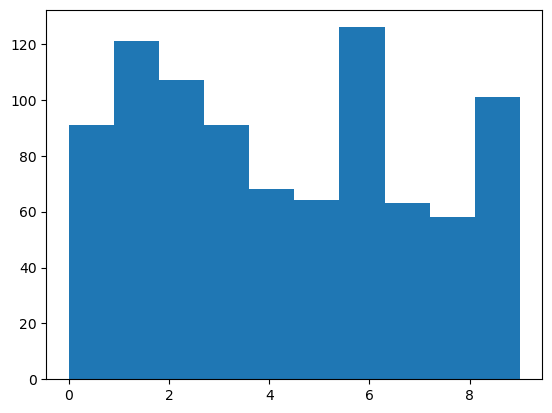

In [61]:
plt.hist(Y_train)

In [17]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential

# Merge inputs and targets
inputs = np.concatenate((X_train, X_validation), axis=0)
targets = np.concatenate((Y_train, Y_validation), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(256,256,1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  # Compile the model
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=32,
              epochs=8,
              verbose=1)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 577s 22s/step - accuracy: 0.1189 - loss: 3.9648
Epoch 2/8
24/25 ━━━━━━━━━━━━━━━━━━━━ 32s 32s/step - accuracy: 0.1681 - loss: 2.2966 

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x126173060>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/weakref.py", line 369, in remove
    def remove(k, selfref=ref(self)):

KeyboardInterrupt: 


KeyboardInterrupt: 

In [10]:
model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 534ms/step - accuracy: 0.2793 - loss: 3.4453


[4.021855354309082, 0.24285714328289032]